In [3]:
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns

In [5]:
pip install neattext



[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import neattext.functions as nfx

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [8]:
df=pd.read_csv('./tweet_emotions.csv')

In [9]:
df.head(5)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [10]:
df2=df.drop(['tweet_id'],axis='columns')

In [11]:
df2.head(5)

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [12]:
df2['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

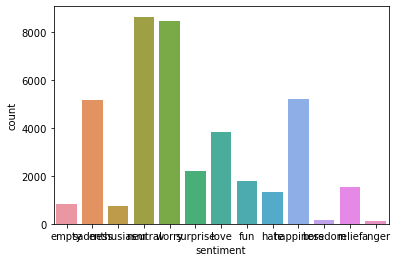

In [13]:
sns.countplot(x='sentiment',data=df2)

In [14]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [15]:
df2['Clean_Text']=df2['content'].apply(nfx.remove_userhandles)

In [16]:
df2['Clean_Text']=df2['Clean_Text'].apply(nfx.remove_stopwords)
df2.head()

,sentiment,content,Clean_Text
0,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freaki...
1,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhh...waitin call...
2,sadness,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!,wants hang friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...,"want trade Houston tickets, will."


In [17]:
df2['Clean_Text']=df2['Clean_Text'].apply(nfx.remove_special_characters)
df2.head()

,sentiment,content,Clean_Text
0,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freakin
1,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhhwaitin call
2,sadness,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday
3,enthusiasm,wants to hang out with friends SOON!,wants hang friends SOON
4,neutral,@dannycastillo We want to trade with someone w...,want trade Houston tickets will


In [18]:
Xfeatures=df2['Clean_Text']
ylabels=df2['sentiment']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [20]:
from sklearn.pipeline import  Pipeline

In [21]:
pipe_lr=Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [22]:
pipe_lr.fit(x_train,y_train)

c:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [23]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [24]:
pipe_lr.score(x_test,y_test)

0.33308333333333334

In [25]:
ex1="This book was so interesting that it made me happy"

In [26]:
pipe_lr.predict([ex1])

array(['happiness'], dtype=object)

In [27]:
pipe_lr.predict_proba([ex1])

array([[6.29975121e-04, 9.19173170e-04, 3.82527535e-04, 6.96160613e-03,
        3.09845619e-03, 6.60165026e-01, 9.87588888e-03, 2.26008336e-01,
        3.84058152e-02, 2.72020172e-03, 1.22540429e-02, 2.65423970e-02,
        1.20365534e-02]])

In [28]:
pipe_lr.classes_

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

In [29]:
import joblib
pipeline_file=open("emotion_classifier_pipe_lr_28_sept_2022.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [30]:
from gettext import install


pip install streamlit

SyntaxError: invalid syntax (Temp/ipykernel_11824/325917275.py, line 4)